##Installation Instructions for Deep Learning Libraries 
1. Pytorch: fallow steps from *https://pytorch.org/get-started/locally/*
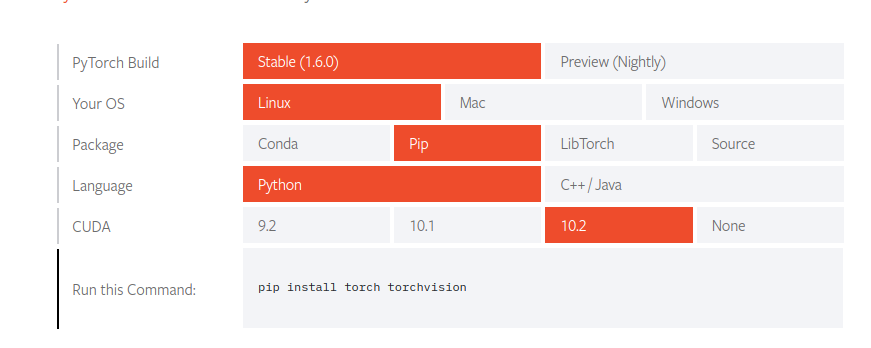[]

2. Tensorflow: *https://www.tensorflow.org/install*
3. Keras: *https://keras.io/*

In [14]:
!pip install torch torchvision
!pip install tensorflow

In [15]:
import torch
import tensorflow as tf
from tensorflow import keras

##Basic Tensor Operations in PyTorch
Reference: *https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/* <br />
**Tensor:** Tensor is a data structure representing multi-dimensional array. It is similar to a NumPy ndarray. It’s size is equivalent to the shape of the NumPy ndarray.

In [4]:
#Run the following code and you should see an un-initialized 2x3 Tensor is printed out.
x = torch.Tensor(2, 3)    # Create an un-initialized Tensor of size 2x3
print(x)                  # Print out the Tensor

tensor([[1.6396e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00]])


In [6]:
# Initialize
x = torch.Tensor(2, 3)  # An un-initialized Tensor object. x holds garbage data.
y = torch.rand(2, 3)    # Initialize with random values
print(x)
print(y)

tensor([[1.6395e-35, 0.0000e+00, 1.6675e-43],
        [5.6052e-44, 1.6816e-43, 6.1657e-44]])
tensor([[0.2839, 0.5108, 0.4193],
        [0.9991, 0.9490, 0.8579]])


In [8]:
#Additina Operation
z1 = x + y
z2 = torch.add(x, y)             # Same as above

print(z2)                        # [torch.FloatTensor of size 2x3]
print(type(z2))

tensor([[0.2839, 0.5108, 0.4193],
        [0.9991, 0.9490, 0.8579]])
<class 'torch.Tensor'>


In [9]:
#In-place operation
#All operations end with “_” is in place operations:

x.add_(y)        # Same as x = x + y

tensor([[0.2839, 0.5108, 0.4193],
        [0.9991, 0.9490, 0.8579]])

In [10]:
#Use of out variable 
r1 = torch.Tensor(2, 3)
torch.add(x, y, out=r1) 

#Same as
r2 = torch.add(x, y)

In [11]:
#Indexing
#We can use the NumPy indexing in Tensors:  tensor[]  

x[:, 1]                          # Can use numpy type indexing
x[:, 0] = 0                      # For assignment

In [16]:
#Conversion between NumPy ndarray and Tensor
import numpy as np

a = np.array([1, 2, 3])
v = torch.from_numpy(a)         # Convert a numpy array to a Tensor

b = v.numpy()                   # Tensor to numpy
b[1] = -1                       # Numpy and Tensor share the same memory
assert(a[1] == b[1])            # Change Numpy will also change the Tensor

In [17]:
### Basic Tensor operation: Number of elements

print(x.size())                        # torch.Size([2, 3])
torch.numel(x)                  # 6: number of elements in x

torch.Size([2, 3])


6

In [19]:
### Tensor resizing
x = torch.randn(2, 3)            # Size 2x3
y = x.view(6)                    # Resize x to size 6
z = x.view(-1, 2)                # Size 3x2

In [20]:
### Create a Tensor

v = torch.Tensor(2, 3)          # An un-initialized torch.FloatTensor of size 2x3
v = torch.Tensor([[1,2],[4,5]]) # A Tensor initialized with a specific array
v = torch.LongTensor([1,2,3])   # A Tensor of type Long

In [21]:
#To increase the reproducibility of result, we often set the random seed to a specific value first.
torch.manual_seed(1)

In [22]:
v = torch.rand(2, 3)            # Initialize with random number (uniform distribution)
print(v)
v = torch.randn(2, 3)           # With normal distribution (SD=1, mean=0)
print(v)
v = torch.randperm(4)           # Size 4. Random permutation of integers from 0 to 3
print(v)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])
tensor([[ 0.5636,  1.1431,  0.8590],
        [ 0.7056, -0.3406, -1.2720]])
tensor([2, 0, 1, 3])


In [24]:
#Type conversion of tensor
#More Details about type of tensors can be find here:  https://pytorch.org/docs/stable/tensors.html 
x = torch.randn(5, 3).type(torch.FloatTensor)

In [25]:
# Identity matrices, Fill Tensor with 0, 1 or values
eye = torch.eye(3)              # Create an identity 3x3 tensor

v = torch.ones(10)              # A tensor of size 10 containing all ones
v = torch.ones(2, 1, 2, 1)      # Size 2x1x2x1
v = torch.ones_like(eye)        # A tensor with same shape as eye. Fill it with 1.

v = torch.zeros(10)             # A tensor of size 10 containing all zeros

# 1  1  1
# 2  2  2
# 3  3  3
v = torch.ones(3, 3)
v[1].fill_(2)
v[2].fill_(3)

tensor([3., 3., 3.])

In [27]:
# 0 1 2
# 3 4 5
# 6 7 8
v = torch.arange(9)
print(v)
v = v.view(3, 3)
print(v)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [28]:
# Concatenation
print(x.size())
print(torch.cat((x, x, x), 0).size())          # Concatenate in the 0 dimension

# Stack
print(v.size())
r = torch.stack((v, v))
print(r.size())

torch.Size([5, 3])
torch.Size([15, 3])
torch.Size([3, 3])
torch.Size([2, 3, 3])


In [30]:
#Split a Tensor
# Split an array into 3 chunks
# (
# 0  1  2
# [torch.FloatTensor of size 1x3]
# ,
# 3  4  5
# [torch.FloatTensor of size 1x3]
# ,
# 6  7  8
# [torch.FloatTensor of size 1x3]
# )
r = torch.chunk(v, 3)
print(r)
# Split an array into chunks of at most size 2
# (
# 0  1  2
# 3  4  5
# [torch.FloatTensor of size 2x3]
# ,
# 6  7  8
# [torch.FloatTensor of size 1x3]
# )
r = torch.split(v, 2)
print(r)

(tensor([[0, 1, 2]]), tensor([[3, 4, 5]]), tensor([[6, 7, 8]]))
(tensor([[0, 1, 2],
        [3, 4, 5]]), tensor([[6, 7, 8]]))


In [33]:
# Index select
# 0 2
# 3 5
# 6 8
indices = torch.LongTensor([0, 2])
print(indices)
r = torch.index_select(v, 1, indices) # Select element 0 and 2 for each dimension 1.
print(r)
# Masked select
# 0  0  0
# 1  1  1
# 1  1  1
mask = v.ge(3)
print(mask)
# Size 6: 3 4 5 6 7 8
r = torch.masked_select(v, mask)
print(r)

tensor([0, 2])
tensor([[0, 2],
        [3, 5],
        [6, 8]])
tensor([[False, False, False],
        [ True,  True,  True],
        [ True,  True,  True]])
tensor([3, 4, 5, 6, 7, 8])


In [28]:
t = torch.ones(2,1,2,1) # Size 2x1x2x1
r = torch.squeeze(t)     # Size 2x2
r = torch.squeeze(t, 1)  # Squeeze dimension 1: Size 2x2x1

# Un-squeeze a dimension
x = torch.Tensor([1, 2, 3])
r = torch.unsqueeze(x, 0)       # Size: 1x3
r = torch.unsqueeze(x, 1)       # Size: 3x1

In [29]:
# Transpose dim 0 and 1
r = torch.transpose(v, 0, 1)

In [30]:
#Uniform, bernoulli, multinomial
# 2x2: A uniform distributed random matrix with range [0, 1]
r = torch.Tensor(2, 2).uniform_(0, 1)

# bernoulli
r = torch.bernoulli(r)   # Size: 2x2. Bernoulli with probability p stored in elements of r

# Multinomial
w = torch.Tensor([0, 4, 8, 2]) # Create a tensor of weights
r = torch.multinomial(w, 4, replacement=True) # Size 4: 3, 2, 1, 2

In [31]:
### Math operations
f= torch.FloatTensor([-1, -2, 3])
r = torch.abs(f)      # 1 2 3

# Add x, y and scalar 10 to all elements
r = torch.add(x, 10)

# Clamp the value of a Tensor
r = torch.clamp(v, min=-0.5, max=0.5)

# Element-wise divide
r = torch.div(v, v+0.03)

# Element-wise multiple
r = torch.mul(v, v)

In [35]:
#Comparison operation
### Comparison
print(v)
# Size 3x3: Element-wise comparison
r = torch.eq(v, v)
print(r)
# Max element with corresponding index
r = torch.max(v, 1)
print(r)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])
torch.return_types.max(
values=tensor([2, 5, 8]),
indices=tensor([2, 2, 2]))


In [36]:
# Dot product of 2 tensors

r = torch.dot(torch.Tensor([4, 2]), torch.Tensor([3, 1])) # 14

In [37]:
### Matrix, vector products

# Matrix X vector
# Size 2x4
mat = torch.randn(2, 4)
vec = torch.randn(4)
r = torch.mv(mat, vec)

# Matrix + Matrix X vector
# Size 2
M = torch.randn(2)
mat = torch.randn(2, 3)
vec = torch.randn(3)
r = torch.addmv(M, mat, vec)

In [38]:
#Matrix, Matrix products
# Matrix x Matrix
# Size 2x4
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
r = torch.mm(mat1, mat2)

# Matrix + Matrix X Matrix
# Size 3x4
M = torch.randn(3, 4)
mat1 = torch.randn(3, 2)
mat2 = torch.randn(2, 4)
r = torch.addmm(M, mat1, mat2)

In [40]:
# Batch Matrix x Matrix
# Size 10x3x5
batch1 = torch.randn(10, 3, 4)
batch2 = torch.randn(10, 4, 5)
r = torch.bmm(batch1, batch2)

# Batch Matrix + Matrix x Matrix
# Performs a batch matrix-matrix product
# 3x4 + (5x3x4 X 5x4x2 ) -> 5x3x2
M = torch.randn(3, 2)
batch1 = torch.randn(5, 3, 4)
batch2 = torch.randn(5, 4, 2)
r = torch.addbmm(M, batch1, batch2)

In [41]:
#Plese refer https://pytorch.org/docs/stable/tensors.html for 100+ more tensor operations

## Introduction to RNN, LSTM and GRU
Reference: 
1. *https://colah.github.io/posts/2015-08-Understanding-LSTMs/*  
2. *https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21*
3. *http://karpathy.github.io/2015/05/21/rnn-effectiveness/*



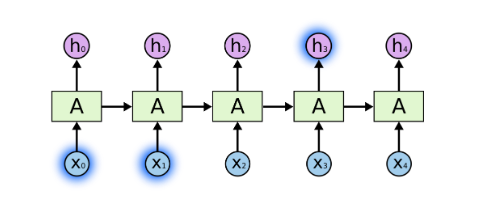

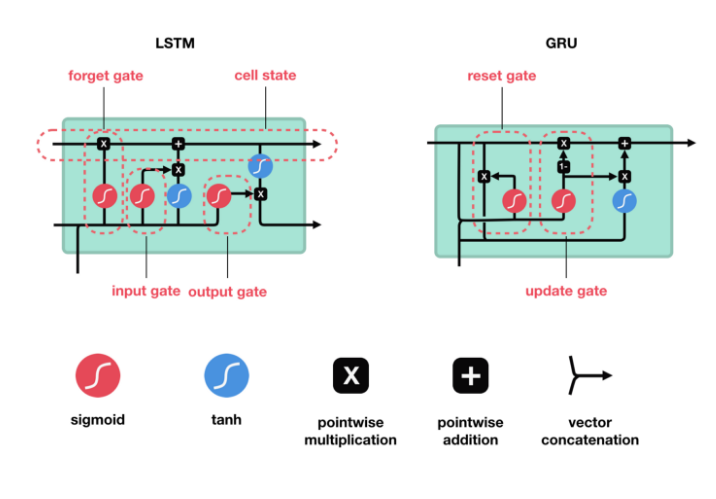

Vanilla RNN

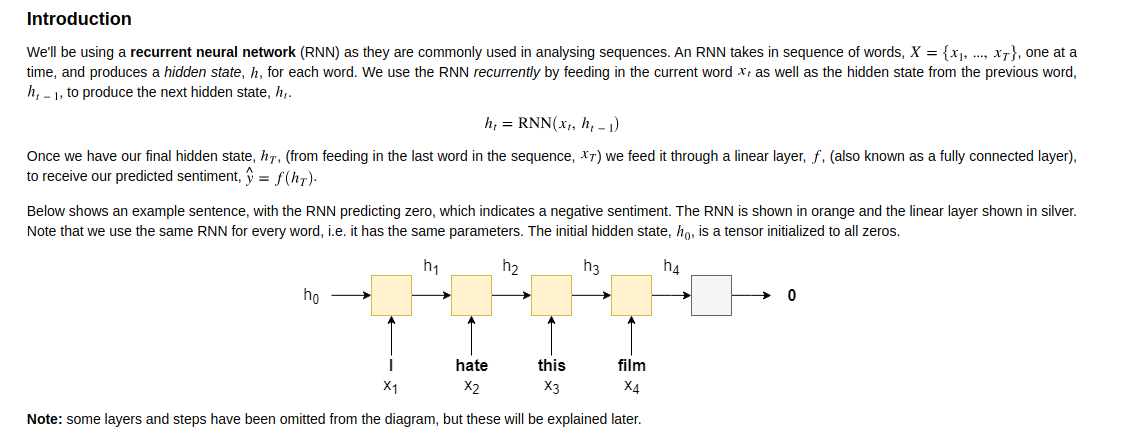

LSTM
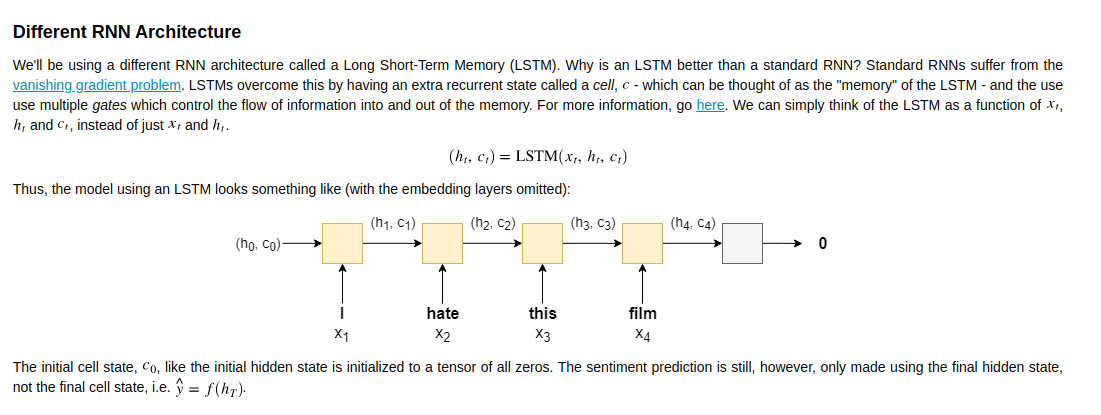

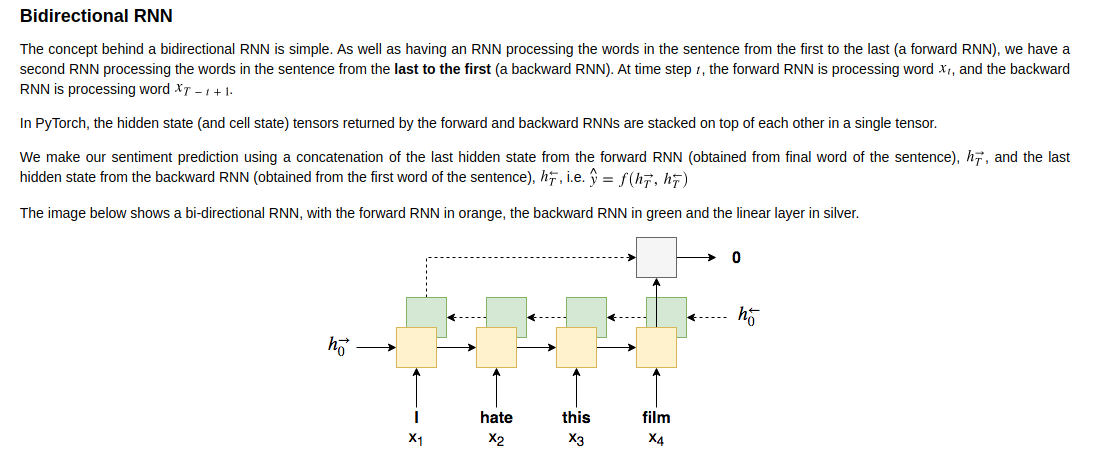

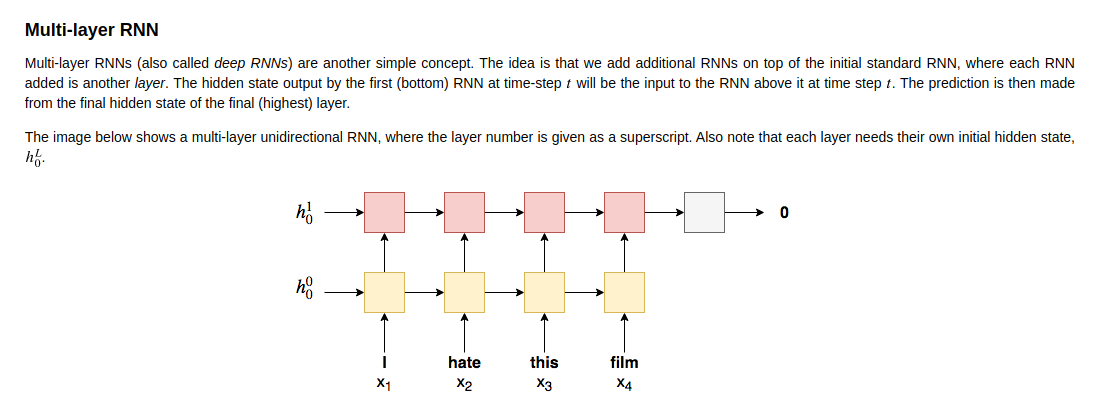

## Application of LSTM: Sentiment analysis using Pytorch and torchtext
In this series we'll be building a machine learning model to detect sentiment (i.e. detect if a sentence is positive or negative) using PyTorch and TorchText. This will be done on movie reviews, using the IMDb dataset: *http://ai.stanford.edu/~amaas/data/sentiment/*.  <br />
**Reference:** *https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/2%20-%20Upgraded%20Sentiment%20Analysis.ipynb* <br />
we will use: <br />
1. packed padded sequences

2. pre-trained word embeddings
3. different RNN architecture
4. bidirectional RNN
3. multi-layer RNN


In [43]:
import torch
from torchtext import data
from torchtext import datasets

#we'll set the seed
SEED = 1234
torch.manual_seed(SEED) 

torch.backends.cudnn.deterministic = True

#In padded sequence (trailing zeros) We have to tell the RNN how long the actual sequences are. 
#We do this by setting include_lengths = True for our TEXT field.
TEXT = data.Field(tokenize = 'spacy', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)
print(TEXT)
print(LABEL)

In [44]:
#We then load the IMDb dataset.
from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:12<00:00, 6.77MB/s]


In [45]:
#Then create the validation set from our training set.
import random
train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [46]:
#Here, we'll be using the "glove.6B.100d" vectors". glove is the algorithm used to calculate the vectors. 
#6B indicates these vectors were trained on 6 billion tokens and 100d indicates these vectors are 100-dimensional.
#You can find more detailed about pre-trained aviavle glove embeddings in torchtext here: https://github.com/pytorch/text/blob/master/torchtext/vocab.py#L113
MAX_VOCAB_SIZE = 25_000

#We get these vectors simply by specifying which vectors we want and passing it as an argument to build_vocab. TorchText handles downloading 
#the vectors and associating them with the correct words in our vocabulary.
TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [06:30, 2.21MB/s]                           
 99%|█████████▉| 397888/400000 [00:17<00:00, 23297.08it/s]

In [47]:
#create the iterators, placing the tensors on the GPU if one is available.
#Another thing for packed padded sequences all of the tensors within a batch need to be sorted by their lengths.
# This is handled in the iterator by setting sort_within_batch = True.

BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

In [48]:
#Build the Model: Bidirectional RNN
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)

In [49]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [50]:
#We'll print out the number of parameters in our model.
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,810,857 trainable parameters


In [51]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [52]:
#We then replace the initial weights of the embedding layer with the pre-trained embeddings.
#Note: this should always be done on the weight.data and not the weight!
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 1.8250,  1.1612,  1.9405,  ..., -0.6524,  0.5291,  0.0298],
        [-0.4934,  0.1781,  0.2512,  ..., -0.5838,  0.5083,  0.3036],
        [-0.3720, -0.0297,  0.3617,  ...,  0.1311,  0.6506,  0.4342]])

In [54]:
#As our <unk> and <pad> token aren't in the pre-trained vocabulary they have been initialized using unk_init (normal) distribution)
#when building our vocab. It is preferable to initialize them both to all zeros to explicitly tell our model that, initially, 
#they are irrelevant for determining sentiment.
#We do this by manually setting their row in the embedding weights matrix to zeros. We get their row by finding the index of
#the tokens, which we have already done for the padding index

UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 1.8250,  1.1612,  1.9405,  ..., -0.6524,  0.5291,  0.0298],
        [-0.4934,  0.1781,  0.2512,  ..., -0.5838,  0.5083,  0.3036],
        [-0.3720, -0.0297,  0.3617,  ...,  0.1311,  0.6506,  0.4342]])


In [57]:
#Training Model
#To change SGD to Adam, we simply change optim.SGD to optim.Adam, also note how we do
#not have to provide an initial learning rate for Adam as PyTorch specifies a sensibile default initial learning rate.
import torch.optim as optim
optimizer = optim.Adam(model.parameters())

#The loss function here is binary cross entropy with logits.
#Our model currently outputs an unbound real number. As our labels are either 0 or 1, we want to restrict the 
#predictions to a number between 0 and 1. We do this using the sigmoid or logit functions.
#We then use this this bound scalar to calculate the loss using binary cross entropy.
#The BCEWithLogitsLoss criterion carries out both the sigmoid and the binary cross entropy steps.

criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

In [58]:

#We implement the function to calculate accuracy...
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [63]:
#function for training our model.
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [60]:
#Function for testing our mode
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [61]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
#Finally, we train our model...
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
#test accuracy!
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Our predict_sentiment function does a few things for to get user sentiment scores:

1. sets the model to evaluation mode
2. tokenizes the sentence, i.e. splits it from a raw string into a list of tokens
3. indexes the tokens by converting them into their integer representation from our vocabulary
4. gets the length of our sequence
5. converts the indexes, which are a Python list into a PyTorch tensor
6. add a batch dimension by unsqueezeing
7. converts the length into a tensor
8. squashes the output prediction from a real number between 0 and 1 with the sigmoid function
9. converts the tensor holding a single value into an integer with the item() method

**We are expecting reviews with a negative sentiment to return a value close to 0 and positive reviews to return a value close to 1**

In [ ]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [ ]:

#An example Negative review...
predict_sentiment(model, "This film is terrible")

#An example positive review...
predict_sentiment(model, "This film is great")

## Application of RNN: CLASSIFYING NAMES WITH A CHARACTER-LEVEL RNN
**Reference:** *https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html* <br />
**Problem Statement:** Train on a few thousand surnames from 18 languages of origin, and predict which language a name is from based on the spellings. <br />
**Approach:** A character-level RNN reads words as a series of characters - outputting a prediction and “hidden state” at each step, feeding its previous hidden state into each next step. We take the final prediction to be the output, i.e. which class the word belongs to.
**Data:** Download data from here (https://download.pytorch.org/tutorial/data.zip) and extract in current wrking directory of notebook 

In [ ]:
$ python predict.py Hinton
(-0.47) Scottish
(-1.52) English
(-3.57) Irish

$ python predict.py Schmidhuber
(-0.19) German
(-2.48) Czech
(-2.68) Dutch

SyntaxError: ignored

In [60]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

[]


In [39]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [40]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [50]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('Colab_Notebook/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(n_categories)

0


In [44]:
print(category_lines['Italian'][:5])

KeyError: ignored

In [ ]:

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

RuntimeError: ignored

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

ValueError: ignored

In [ ]:
criterion = nn.NLLLoss()
#Each loop of training will:

#Create input and target tensors
#Create a zeroed initial hidden state
#Read each letter in and
#Keep hidden state for next letter
#Compare final output to target
#Back-propagate
#Return the output and loss

In [ ]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)